In [ ]:
#!/usr/bin/env python
#-*- coding: utf-8 -*-

from __future__ import division, print_function, absolute_import

from keras.datasets import mnist
from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.layers import BatchNormalization
from keras.optimizers import SGD
import keras.backend as K
import keras.utils

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


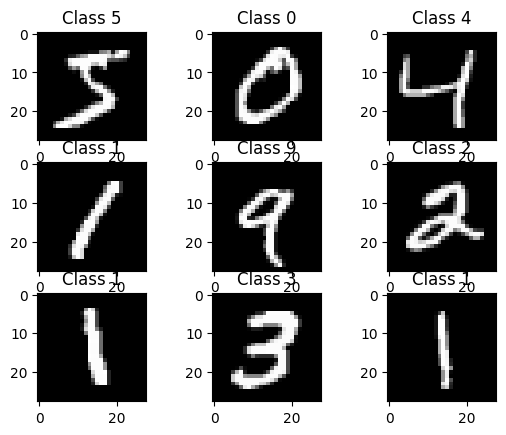

In [ ]:

# Load Data
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

# Visualise the data
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

plt.show()

In [ ]:
# Normalise Data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

# Convert output class type
Y_train = keras.utils.to_categorical(y_train, nb_classes)
Y_test = keras.utils.to_categorical(y_test, nb_classes)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
# Define AlexNet model
def alexnet():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (7, 7), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(192, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(1, 1)))

    model.add(Flatten())
    model.add(Dense(4096))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4096))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    return model

In [ ]:
import tensorflow as tf
#with K.tf.device('/gpu:0'): # Remove this old way of specifying device
with tf.device('/gpu:0'): # Directly using tf for device placement
    model = alexnet()
    optim = SGD(learning_rate=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['acc'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(X_train.reshape(60000, 28, 28, 1), Y_train, batch_size=50, epochs=3,
          validation_data=(X_test.reshape(10000, 28, 28, 1), Y_test), verbose=1)

Epoch 1/3
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - acc: 0.6610 - loss: 1.2685 - val_acc: 0.9233 - val_loss: 0.6304
Epoch 2/3
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - acc: 0.9061 - loss: 0.7031 - val_acc: 0.9456 - val_loss: 0.5442
Epoch 3/3
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - acc: 0.9291 - loss: 0.6254 - val_acc: 0.9551 - val_loss: 0.5014


In [ ]:
score = model.evaluate(X_test.reshape(10000, 28, 28, 1), Y_test, verbose=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.9457 - loss: 0.5440


In [ ]:
predicted_classes = model.predict(X_test.reshape(10000, 28, 28, 1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


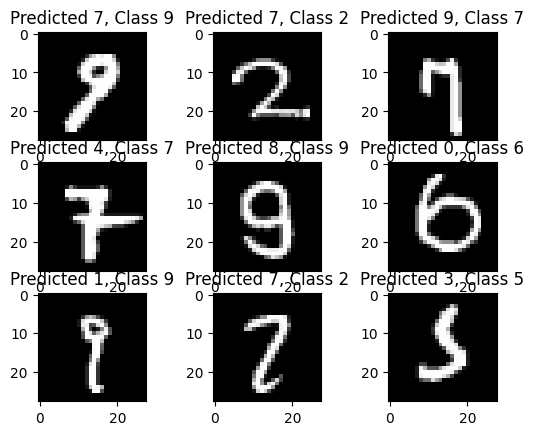

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ... (your existing code) ...

predicted_classes = model.predict(X_test.reshape(10000, 28, 28, 1))
predicted_classes = np.argmax(predicted_classes, axis=1) # Get the predicted class labels

# Calculate incorrect indices
incorrect_indices = np.where(predicted_classes != y_test)[0]

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray',
               interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect],
                                              y_test[incorrect]))

plt.show()

In [ ]:
model.save("./myAlexnetmodel.keras")

In [ ]:
import glob
import numpy as np
import os
import shutil
np.random.seed(42)

In [ ]:
from zipfile import ZipFile
file_name = "/content/dogs-vs-cats.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
from zipfile import ZipFile
file_name = "/content/train.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
import os

# Check files in the current Colab environment
print(os.listdir("/content"))


['.config', 'train', 'dogs-vs-cats.zip', 'sampleSubmission.csv', 'myAlexnetmodel.keras', 'train.zip', 'test1.zip', 'sample_data']


In [ ]:
import os
import glob

data_path = "/content/train"  # Change this to the correct folder after upload

# Check if the directory exists
if os.path.exists(data_path):
    print("Directory exists:", os.listdir(data_path))
else:
    print("Directory not found!")


Directory exists: ['cat.4154.jpg', 'cat.6626.jpg', 'cat.12380.jpg', 'cat.8846.jpg', 'dog.2815.jpg', 'cat.6917.jpg', 'cat.4327.jpg', 'cat.683.jpg', 'cat.9876.jpg', 'cat.5626.jpg', 'cat.8649.jpg', 'cat.10332.jpg', 'dog.2995.jpg', 'dog.7964.jpg', 'dog.2162.jpg', 'cat.7840.jpg', 'dog.1184.jpg', 'dog.60.jpg', 'dog.11980.jpg', 'cat.5770.jpg', 'dog.4235.jpg', 'dog.1454.jpg', 'dog.580.jpg', 'cat.11042.jpg', 'cat.9148.jpg', 'dog.5121.jpg', 'dog.3675.jpg', 'cat.732.jpg', 'dog.11910.jpg', 'dog.10518.jpg', 'cat.5518.jpg', 'dog.747.jpg', 'cat.10618.jpg', 'dog.4089.jpg', 'cat.8566.jpg', 'dog.2193.jpg', 'dog.3488.jpg', 'dog.10368.jpg', 'cat.12033.jpg', 'dog.3899.jpg', 'dog.9583.jpg', 'dog.4179.jpg', 'cat.8705.jpg', 'dog.1933.jpg', 'cat.5595.jpg', 'dog.4104.jpg', 'cat.11880.jpg', 'dog.5519.jpg', 'dog.4795.jpg', 'cat.5826.jpg', 'dog.7600.jpg', 'cat.8190.jpg', 'dog.11469.jpg', 'cat.4214.jpg', 'dog.2063.jpg', 'dog.10521.jpg', 'dog.9273.jpg', 'cat.10147.jpg', 'dog.6468.jpg', 'cat.593.jpg', 'cat.2485.jpg',

In [ ]:
files = glob.glob(data_path + "/*")  # Get all files inside "train" folder

# Filter cat and dog images
cat_files = [fn for fn in files if 'cat' in fn]
dog_files = [fn for fn in files if 'dog' in fn]

print(dog_files)  # Should show dog file names


['/content/train/dog.2815.jpg', '/content/train/dog.2995.jpg', '/content/train/dog.7964.jpg', '/content/train/dog.2162.jpg', '/content/train/dog.1184.jpg', '/content/train/dog.60.jpg', '/content/train/dog.11980.jpg', '/content/train/dog.4235.jpg', '/content/train/dog.1454.jpg', '/content/train/dog.580.jpg', '/content/train/dog.5121.jpg', '/content/train/dog.3675.jpg', '/content/train/dog.11910.jpg', '/content/train/dog.10518.jpg', '/content/train/dog.747.jpg', '/content/train/dog.4089.jpg', '/content/train/dog.2193.jpg', '/content/train/dog.3488.jpg', '/content/train/dog.10368.jpg', '/content/train/dog.3899.jpg', '/content/train/dog.9583.jpg', '/content/train/dog.4179.jpg', '/content/train/dog.1933.jpg', '/content/train/dog.4104.jpg', '/content/train/dog.5519.jpg', '/content/train/dog.4795.jpg', '/content/train/dog.7600.jpg', '/content/train/dog.11469.jpg', '/content/train/dog.2063.jpg', '/content/train/dog.10521.jpg', '/content/train/dog.9273.jpg', '/content/train/dog.6468.jpg', '/con

In [ ]:
print(cat_files)  # Should show cat file names

['/content/train/cat.4154.jpg', '/content/train/cat.6626.jpg', '/content/train/cat.12380.jpg', '/content/train/cat.8846.jpg', '/content/train/cat.6917.jpg', '/content/train/cat.4327.jpg', '/content/train/cat.683.jpg', '/content/train/cat.9876.jpg', '/content/train/cat.5626.jpg', '/content/train/cat.8649.jpg', '/content/train/cat.10332.jpg', '/content/train/cat.7840.jpg', '/content/train/cat.5770.jpg', '/content/train/cat.11042.jpg', '/content/train/cat.9148.jpg', '/content/train/cat.732.jpg', '/content/train/cat.5518.jpg', '/content/train/cat.10618.jpg', '/content/train/cat.8566.jpg', '/content/train/cat.12033.jpg', '/content/train/cat.8705.jpg', '/content/train/cat.5595.jpg', '/content/train/cat.11880.jpg', '/content/train/cat.5826.jpg', '/content/train/cat.8190.jpg', '/content/train/cat.4214.jpg', '/content/train/cat.10147.jpg', '/content/train/cat.593.jpg', '/content/train/cat.2485.jpg', '/content/train/cat.7084.jpg', '/content/train/cat.11809.jpg', '/content/train/cat.6119.jpg', '/

In [ ]:
len(dog_files),len(cat_files)

(12500, 12500)

In [ ]:
# choose a random sub-set of 1500 images [names] for training set
cat_train = np.random.choice(cat_files, size=1500, replace=False)
dog_train = np.random.choice(dog_files, size=1500, replace=False)

# subtract/del the training set from the original set
cat_files = list(set(cat_files) - set(cat_train))
dog_files = list(set(dog_files) - set(dog_train))


In [ ]:
print(len(cat_files),len(dog_files))

11000 11000


In [ ]:
len(cat_files), len(dog_files)


(11000, 11000)

In [ ]:
cat_val = np.random.choice(cat_files, size=500, replace=False)
dog_val = np.random.choice(dog_files, size=500, replace=False)

In [ ]:
cat_files = list(set(cat_files) - set(cat_val))
dog_files = list(set(dog_files) - set(dog_val))

In [ ]:
len(cat_files), len(dog_files)

(10500, 10500)

In [ ]:
len(cat_val), len(dog_val)

(500, 500)

In [ ]:
# choose a random sub-set of 500 images [names] for test set
cat_test = np.random.choice(cat_files, size=500, replace=False)
dog_test = np.random.choice(dog_files, size=500, replace=False)

In [ ]:
print('Cat datasets:', cat_train.shape, cat_val.shape, cat_test.shape)
print('Dog datasets:', dog_train.shape, dog_val.shape, dog_test.shape)

Cat datasets: (1500,) (500,) (500,)
Dog datasets: (1500,) (500,) (500,)


In [ ]:
train_dir = 'training_data'
val_dir = 'validation_data'
test_dir = 'test_data'

# concat images of cat and dog classes across training, testing and validation sets
# essentially mixing (addresses) images of cats and dogs across training, testing a
train_files = np.concatenate([cat_train, dog_train])
validate_files = np.concatenate([cat_val, dog_val])
test_files = np.concatenate([cat_test, dog_test])

# create separate directories for each set
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# physically copy the files into the designated folders
for fn in train_files:
    shutil.copy(fn, train_dir)

for fn in validate_files:
    shutil.copy(fn, val_dir)

for fn in test_files:
    shutil.copy(fn, test_dir)

In [ ]:
!pip install tensorflow

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import from tensorflow.keras
from tensorflow.keras.preprocessing.image import load_img # Import from tensorflow.keras
from tensorflow.keras.preprocessing.image import img_to_array # Import from tensorflow.keras
from tensorflow.keras.preprocessing.image import array_to_img # Import from tensorflow.keras
%matplotlib inline

# Let's now load our datasets, using the following code snippet.

In [ ]:
IMG_DIM = (150, 150)

# training images path
train_files = glob.glob('training_data/*')

# Load training images
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM))
              for img in train_files]

# convert images to numpy array
train_imgs = np.array(train_imgs)

# create Labels by splitting training file name
train_labels = [fn.split('/')[-1].split('.')[0].strip() for fn in train_files]

# validation images path
validation_files = glob.glob('validation_data/*')

# Load validation images
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM))
                   for img in validation_files]

# convert images to numpy array
validation_imgs = np.array(validation_imgs)

# create Labels by splitting training file name
validation_labels = [fn.split('/')[-1].split('.')[0].strip() for fn in validation_files]


In [ ]:
print('Train dataset shape:', train_imgs.shape,
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [ ]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled = validation_imgs.astype('float32')

train_imgs_scaled /= 255
validation_imgs_scaled /= 255

(150, 150, 3)


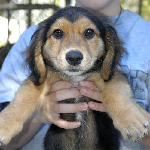

In [ ]:
print(train_imgs[1].shape)
array_to_img(train_imgs[300])


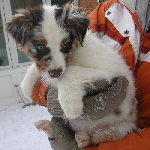

In [ ]:
array_to_img(train_imgs[1700])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)

train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

# Label encoding >>> dog = 1 cat = 0

print(train_labels[1450:1463])
print(train_labels_enc[1450:1463])

['dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat']
[1 0 0 1 1 1 1 1 0 0 0 0 0]


In [ ]:
from keras.applications import vgg16, resnet
from keras.models import Model
import keras

input_shape = (150, 150, 3)


In [ ]:
# Loading pretrained vgg16 without top fully connected layers
vgg = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

# adding our own custom made Flatten Layer on top of pretrained vgg16 Conv Layers
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

# freeze all the Layers
vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
import pandas as pd
pd.set_option('max_colwidth', None) # corrected line

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])


,Layer Type,Layer Name,Layer Trainable
0,"<InputLayer name=input_layer_1, built=True>",input_layer_1,False
1,"<Conv2D name=block1_conv1, built=True>",block1_conv1,False
2,"<Conv2D name=block1_conv2, built=True>",block1_conv2,False
3,"<MaxPooling2D name=block1_pool, built=True>",block1_pool,False
4,"<Conv2D name=block2_conv1, built=True>",block2_conv1,False
5,"<Conv2D name=block2_conv2, built=True>",block2_conv2,False
6,"<MaxPooling2D name=block2_pool, built=True>",block2_pool,False
7,"<Conv2D name=block3_conv1, built=True>",block3_conv1,False
8,"<Conv2D name=block3_conv2, built=True>",block3_conv2,False
9,"<Conv2D name=block3_conv3, built=True>",block3_conv3,False


In [ ]:
# Loading pretrained resnet without top fully connected Layers
resnet = resnet.ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)

# adding our own custom made Flatten Layer on top of pretrained resnet Conv Layers
output = resnet.layers[-1].output
output = keras.layers.Flatten()(output)
resnet_model = Model(resnet.input, output)

# freeze all the Layers
resnet_model.trainable = False
for layer in resnet_model.layers:
    layer.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
import pandas as pd
pd.set_option('max_colwidth', None) # Corrected line
layers = [(layer, layer.name, layer.trainable) for layer in resnet_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<InputLayer name=input_layer_2, built=True>",input_layer_2,False
1,"<ZeroPadding2D name=conv1_pad, built=True>",conv1_pad,False
2,"<Conv2D name=conv1_conv, built=True>",conv1_conv,False
3,"<BatchNormalization name=conv1_bn, built=True>",conv1_bn,False
4,"<Activation name=conv1_relu, built=True>",conv1_relu,False
...,...,...,...
171,"<Conv2D name=conv5_block3_3_conv, built=True>",conv5_block3_3_conv,False
172,"<BatchNormalization name=conv5_block3_3_bn, built=True>",conv5_block3_3_bn,False
173,"<Add name=conv5_block3_add, built=True>",conv5_block3_add,False
174,"<Activation name=conv5_block3_out, built=True>",conv5_block3_out,False


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from tensorflow.keras import optimizers

In [ ]:
# Stack our fully connected Layers on top of VGG16 model. VGG16's output will be the
# custom-made Layers

modelvgg = Sequential()
modelvgg.add(vgg_model)

modelvgg.add(Dense(512, activation='relu', input_dim=input_shape))
modelvgg.add(Dropout(0.3))

modelvgg.add(Dense(512, activation='relu'))
modelvgg.add(Dropout(0.3))

modelvgg.add(Dense(1, activation='sigmoid'))

modelvgg.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=1e-4),
                  metrics=['accuracy'])

modelvgg.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ functional_26 (Functional)           │ (None, 8192)                │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,172,673 (73.14 MB)

 Trainable params: 4,457,985 (17.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# SAVE MODEL--
modelvgg.save("./myVGGmodel.keras")

In [ ]:
# Load the vgg model
from tensorflow import keras
modelvgg = keras.models.load_model('./myVGGmodel.keras')


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Training the model
historyvgg = modelvgg.fit(x=train_imgs_scaled, y=train_labels_enc,
                          validation_data=(validation_imgs_scaled, validation_labels_enc),
                          batch_size=20,
                          epochs=3,
                          verbose=1)

Epoch 1/3
150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 106ms/step - accuracy: 0.7270 - loss: 0.5383 - val_accuracy: 0.8720 - val_loss: 0.2836
Epoch 2/3
150/150 ━━━━━━━━━━━━━━━━━━━━ 35s 102ms/step - accuracy: 0.8624 - loss: 0.2959 - val_accuracy: 0.8700 - val_loss: 0.2752
Epoch 3/3
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 103ms/step - accuracy: 0.8971 - loss: 0.2368 - val_accuracy: 0.8830 - val_loss: 0.2529


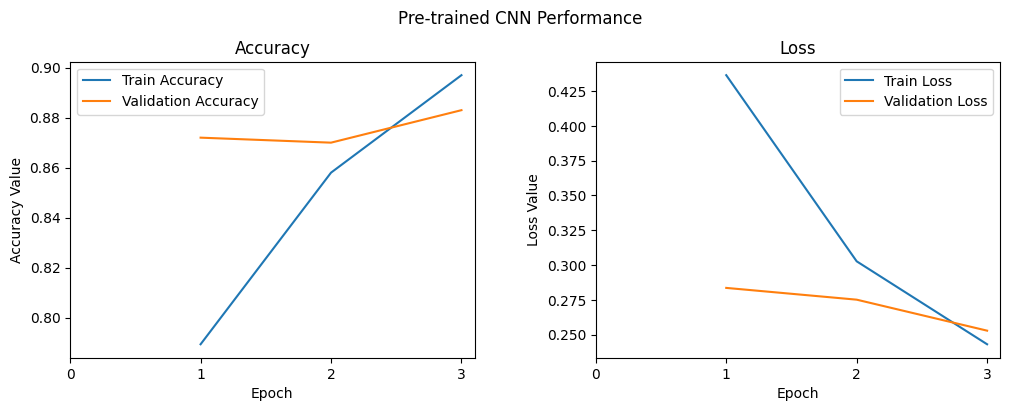

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
f.suptitle('Pre-trained CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

# Fix: Create epoch_list based on the actual number of epochs
epoch_list = list(range(1, len(historyvgg.history['accuracy']) + 1))

ax1.plot(epoch_list, historyvgg.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, historyvgg.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, len(historyvgg.history['accuracy']) + 1, 1)) # Adjust x-axis ticks
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
ax1.legend(loc="best")

ax2.plot(epoch_list, historyvgg.history['loss'], label='Train Loss')
ax2.plot(epoch_list, historyvgg.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, len(historyvgg.history['accuracy']) + 1, 1)) # Adjust x-axis ticks
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
ax2.legend(loc="best")

In [ ]:
import matplotlib.pyplot as plt
from skimage.transform import resize
import cv2

# Provide full path to image
cat = cv2.imread('/content/cat.jpg')  # Replace with the actual path

if cat is None:
  print("Error: Image not loaded. Check file path and existence.")
else:
  resized_cat = resize(cat, (150, 150, 3))
  plt.imshow(resized_cat, cmap='gray')

  classes = ['cat', 'dog']
  pred = modelvgg.predict(np.expand_dims(resized_cat, 0))

  print("It seems to be ", classes[int(np.round(pred))])

Error: Image not loaded. Check file path and existence.
